<a href="https://colab.research.google.com/github/derindidinedin/crime/blob/main/2Invent_Analytics_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Invent Analytis Promotion Bump Assignment

I have coded using the Python programming language on Google Colab.

## Data Cleaning and Preparation

I have uploaded the data files onto Google Colab from Google Drive.

In [17]:
#Connecting the Google Colab file to my Google Drive account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
#Loading all of the datasets
sales_data = pd.read_csv('/assignment4.1a.csv')
additional_sales_data = pd.read_csv('/assignment4.1b.csv')
product_categories = pd.read_csv('/assignment4.1c.csv')
promotion_dates = pd.read_csv('/PromotionDates.csv')

In [20]:
# Displaying the first few rows of each dataset
print("Sales Data:")
display(sales_data.head())

print("\nPromotion Dates:")
display(promotion_dates.head())

print("\nAdditional Sales Data:")
display(additional_sales_data.head())

print("\nProduct Categories:")
display(product_categories.head())

Sales Data:


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0



Promotion Dates:


,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,1/9/2015,6/9/2015



Additional Sales Data:


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1



Product Categories:


,ProductCode,ProductGroup1,ProductGroup2
0,1,A,5
1,2,A,5
2,3,A,5
3,4,A,5
4,5,A,5


In [21]:
#Defining the file paths for the data sets to run the summary statistics function
file_paths = {
    'sales_data': '/assignment4.1a.csv',
    'additional_sales_data': '/assignment4.1b.csv',
    'product_categories': '/assignment4.1c.csv',
    'promotion_dates': '/PromotionDates.csv'
}

dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Displaying the summary statistics for each dataset
for name, df in dataframes.items():
    print(f"\nSummary statistics for {name} before cleaning:\n")
    display(df.describe())


Summary statistics for sales_data before cleaning:



,StoreCode,ProductCode,SalesQuantity
count,1.873618e+06,1.873618e+06,1.873618e+06
mean,1.711288e+02,1.663533e+02,2.246632e+00
std,1.014606e+02,7.773282e+01,5.028994e+00
min,1.000000e+00,1.000000e+00,-6.000000e+01
25%,8.100000e+01,1.050000e+02,0.000000e+00
50%,1.700000e+02,1.730000e+02,1.000000e+00
75%,2.640000e+02,2.190000e+02,2.000000e+00
max,3.400000e+02,3.170000e+02,9.120000e+02



Summary statistics for additional_sales_data before cleaning:



,StoreCode,ProductCode,SalesQuantity
count,1.028121e+06,1.028121e+06,1.028121e+06
mean,1.693992e+02,1.601496e+02,2.052804e+00
std,1.004842e+02,8.033483e+01,4.699980e+00
min,1.000000e+00,1.000000e+00,-1.200000e+02
25%,8.100000e+01,9.500000e+01,0.000000e+00
50%,1.660000e+02,1.670000e+02,1.000000e+00
75%,2.610000e+02,2.180000e+02,2.000000e+00
max,3.400000e+02,3.170000e+02,2.760000e+02



Summary statistics for product_categories before cleaning:



,ProductCode,ProductGroup2
count,317.000000,317.000000
mean,159.000000,13.921136
std,91.654242,9.063250
min,1.000000,1.000000
25%,80.000000,5.000000
50%,159.000000,14.000000
75%,238.000000,23.000000
max,317.000000,30.000000



Summary statistics for promotion_dates before cleaning:



,Period,StartDate,EndDate
count,6,6,6
unique,6,6,6
top,Promo1,2/10/2015,2/17/2015
freq,1,1,1


In [22]:
# Converting date columns to datetime
def convert_to_datetime(df, column):
    df[column] = pd.to_datetime(df[column], errors='coerce')
    missing_dates = df[column].isnull().sum()
    if missing_dates > 0:
        print(f"There is {missing_dates} missing date in column {column}.")
    return df

sales_data = convert_to_datetime(sales_data, 'Date')
additional_sales_data = convert_to_datetime(additional_sales_data, 'Date')
promotion_dates = convert_to_datetime(promotion_dates, 'StartDate')
promotion_dates = convert_to_datetime(promotion_dates, 'EndDate')

# Checking for missing values
print("Missing values in sales data:\n", sales_data.isnull().sum())
print("\nMissing values in additional sales data:\n", additional_sales_data.isnull().sum())
print("\nMissing values in promotion dates:\n", promotion_dates.isnull().sum())
print("\nMissing values in product categories:\n", product_categories.isnull().sum())

# Removing duplicates
for name, df in dataframes.items():
    df.drop_duplicates(inplace=True)

# Removing missing values from each dataset
for name, df in dataframes.items():
    dataframes[name] = df.dropna()
    print(f"\nAfter removing missing values, missing values in {name}:\n", dataframes[name].isnull().sum())

# Displaying summary statistics after removing missing values
for name, df in dataframes.items():
    print(f"\nSummary statistics for {name} after removing missing values:\n")
    display(df.describe())

# Displaying the first few rows of the cleaned data
display(sales_data.head())
display(additional_sales_data.head())
display(promotion_dates.head())
display(product_categories.head())

There is 1 missing date in column StartDate.
There is 1 missing date in column EndDate.
Missing values in sales data:
 Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

Missing values in additional sales data:
 Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

Missing values in promotion dates:
 Period       0
StartDate    1
EndDate      1
dtype: int64

Missing values in product categories:
 ProductCode      0
ProductGroup1    0
ProductGroup2    0
dtype: int64

After removing missing values, missing values in sales_data:
 Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

After removing missing values, missing values in additional_sales_data:
 Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

After removing missing values, missing values in product_categories:
 ProductCode      0
ProductGroup1    0
ProductGroup2    0
dtype: int64

,StoreCode,ProductCode,SalesQuantity
count,1.873618e+06,1.873618e+06,1.873618e+06
mean,1.711288e+02,1.663533e+02,2.246632e+00
std,1.014606e+02,7.773282e+01,5.028994e+00
min,1.000000e+00,1.000000e+00,-6.000000e+01
25%,8.100000e+01,1.050000e+02,0.000000e+00
50%,1.700000e+02,1.730000e+02,1.000000e+00
75%,2.640000e+02,2.190000e+02,2.000000e+00
max,3.400000e+02,3.170000e+02,9.120000e+02



Summary statistics for additional_sales_data after removing missing values:



,StoreCode,ProductCode,SalesQuantity
count,1.028121e+06,1.028121e+06,1.028121e+06
mean,1.693992e+02,1.601496e+02,2.052804e+00
std,1.004842e+02,8.033483e+01,4.699980e+00
min,1.000000e+00,1.000000e+00,-1.200000e+02
25%,8.100000e+01,9.500000e+01,0.000000e+00
50%,1.660000e+02,1.670000e+02,1.000000e+00
75%,2.610000e+02,2.180000e+02,2.000000e+00
max,3.400000e+02,3.170000e+02,2.760000e+02



Summary statistics for product_categories after removing missing values:



,ProductCode,ProductGroup2
count,317.000000,317.000000
mean,159.000000,13.921136
std,91.654242,9.063250
min,1.000000,1.000000
25%,80.000000,5.000000
50%,159.000000,14.000000
75%,238.000000,23.000000
max,317.000000,30.000000



Summary statistics for promotion_dates after removing missing values:



,Period,StartDate,EndDate
count,6,6,6
unique,6,6,6
top,Promo1,2/10/2015,2/17/2015
freq,1,1,1


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1


,Period,StartDate,EndDate
0,Promo1,2015-02-10,2015-02-17
1,Promo2,2015-03-15,2015-03-22
2,Promo3,2015-05-24,2015-06-01
3,Promo4,2015-06-21,2015-06-28
4,Promo5,2015-01-09,2015-06-09


,ProductCode,ProductGroup1,ProductGroup2
0,1,A,5
1,2,A,5
2,3,A,5
3,4,A,5
4,5,A,5


## Categorising the Data

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Convert date columns to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
promotion_dates['StartDate'] = pd.to_datetime(promotion_dates['StartDate'])
promotion_dates['EndDate'] = pd.to_datetime(promotion_dates['EndDate'])

# Define promotion periods (for the first 4 promotions)
promo_periods = [
    (pd.to_datetime('2015-02-10'), pd.to_datetime('2015-02-17')),
    (pd.to_datetime('2015-03-15'), pd.to_datetime('2015-03-22')),
    (pd.to_datetime('2015-05-24'), pd.to_datetime('2015-06-01')),
    (pd.to_datetime('2015-06-21'), pd.to_datetime('2015-06-28'))
]

# Define non-promotion periods (before and between the first 4 promotions)
non_promo_periods = [
    (pd.to_datetime('2015-01-01'), pd.to_datetime('2015-02-09')),
    (pd.to_datetime('2015-02-18'), pd.to_datetime('2015-03-14')),
    (pd.to_datetime('2015-03-23'), pd.to_datetime('2015-05-23')),
    (pd.to_datetime('2015-06-02'), pd.to_datetime('2015-06-20')),
    (pd.to_datetime('2015-06-29'), pd.to_datetime('2015-08-01'))
]

# Filter sales data for non-promotion periods
non_promo_sales = pd.concat(
    [sales_data[(sales_data['Date'] >= start) & (sales_data['Date'] <= end)] for start, end in non_promo_periods]
)

# Filter sales data for promotion periods
promo_sales = pd.concat(
    [sales_data[(sales_data['Date'] >= start) & (sales_data['Date'] <= end)] for start, end in promo_periods]
)

# Calculate weekly sales
non_promo_sales['Week'] = non_promo_sales['Date'].dt.isocalendar().week
promo_sales['Week'] = promo_sales['Date'].dt.isocalendar().week

# Aggregate weekly sales
weekly_non_promo_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode', 'Week'])['SalesQuantity'].sum().reset_index()
weekly_promo_sales = promo_sales.groupby(['ProductCode', 'StoreCode', 'Week'])['SalesQuantity'].sum().reset_index()

# Calculate average weekly sales per store for each product during non-promotion periods
avg_weekly_non_promo_sales = weekly_non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()

# Cluster products based on average weekly sales
product_avg_sales = avg_weekly_non_promo_sales.groupby('ProductCode')['SalesQuantity'].mean().reset_index()
kmeans_product = KMeans(n_clusters=3, random_state=42)
product_avg_sales['Cluster'] = kmeans_product.fit_predict(product_avg_sales[['SalesQuantity']])
product_avg_sales['Cluster'] = product_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Cluster stores based on average weekly sales
store_avg_sales = avg_weekly_non_promo_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()
kmeans_store = KMeans(n_clusters=3, random_state=42)
store_avg_sales['Cluster'] = kmeans_store.fit_predict(store_avg_sales[['SalesQuantity']])
store_avg_sales['Cluster'] = store_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Display the clusters
print(product_avg_sales.head())
print(store_avg_sales.head())

# Calculate average sales during promotion periods
promo_sales_summary = weekly_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()

# Merge with cluster data
promo_sales_summary = promo_sales_summary.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode')
promo_sales_summary = promo_sales_summary.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', suffixes=('_Product', '_Store'))

# Calculate sales increase during promotions
non_promo_sales_summary = avg_weekly_non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
sales_comparison = pd.merge(non_promo_sales_summary, promo_sales_summary, on=['ProductCode', 'StoreCode'], suffixes=('_non_promo', '_promo'))
sales_comparison['SalesIncrease'] = sales_comparison['SalesQuantity_promo'] - sales_comparison['SalesQuantity_non_promo']

# Analyze by product and store clusters
product_cluster_effect = sales_comparison.groupby('Cluster_Product')['SalesIncrease'].mean()
store_cluster_effect = sales_comparison.groupby('Cluster_Store')['SalesIncrease'].mean()

print("Sales Increase by Product Cluster:")
print(product_cluster_effect)

print("\nSales Increase by Store Cluster:")
print(store_cluster_effect)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   ProductCode  SalesQuantity Cluster
0            1       2.615018    Slow
1            2       2.215323    Slow
2            3       1.959983    Slow
3            4       2.179474    Slow
4            5       2.213376    Slow
   StoreCode  SalesQuantity Cluster
0          1       2.501286    Slow
1          2       5.778254    Fast
2          3       2.060942    Slow
3          4       2.575316  Medium
4          5       2.226594    Slow
Sales Increase by Product Cluster:
Cluster_Product
Fast      0.566141
Medium   -1.850344
Slow      0.070529
Name: SalesIncrease, dtype: float64

Sales Increase by Store Cluster:
Cluster_Store
Fast     -0.340292
Medium    0.111698
Slow      0.139881
Name: SalesIncrease, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     ProductCode  SalesQuantity  Cluster
0              1       1.918387        2
1              2       1.702871        2
2              3       1.584558        2
3              4       1.693642        2
4              5       1.701154        2
..           ...            ...      ...
311          313       2.040575        2
312          314       0.719431        0
313          315       0.434875        0
314          316       0.505890        0
315          317       0.340827        0

[316 rows x 3 columns]


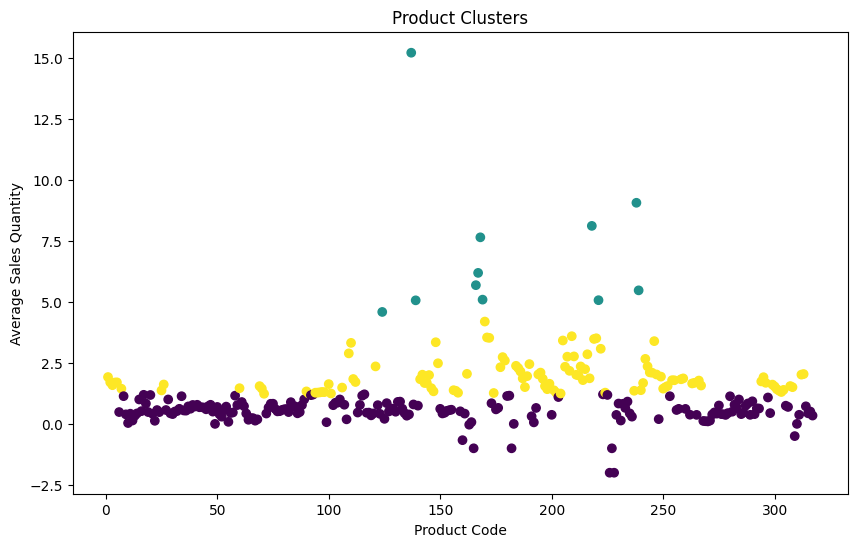

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     StoreCode  SalesQuantity  Cluster
0            1       1.594803        2
1            2       2.029261        2
2            3       1.285126        0
3            4       1.467944        0
4            5       1.442343        0
..         ...            ...      ...
335        336       1.333010        0
336        337       1.383420        0
337        338       1.365211        0
338        339       1.426147        0
339        340       1.498969        0

[340 rows x 3 columns]


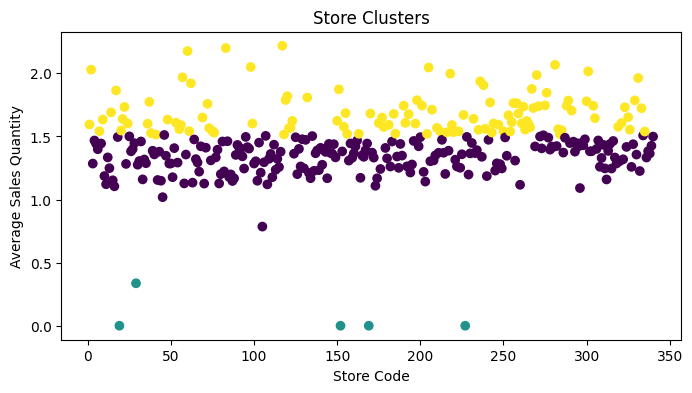

In [29]:
# Defining promotion periods (for the first 4 promotions)
promo_periods = [
    (pd.to_datetime('2015-02-10'), pd.to_datetime('2015-02-17')),
    (pd.to_datetime('2015-03-15'), pd.to_datetime('2015-03-22')),
    (pd.to_datetime('2015-05-24'), pd.to_datetime('2015-06-01')),
    (pd.to_datetime('2015-06-21'), pd.to_datetime('2015-06-28'))
]

# Filtering non-promotion periods
non_promo_sales = pd.concat(
    [sales_data[(sales_data['Date'] >= start) & (sales_data['Date'] <= end)] for start, end in non_promo_periods]
)

# Calculating average sales per product and store
avg_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()

# Reshaping data for clustering (byproduct)
product_avg_sales = avg_sales.groupby('ProductCode')['SalesQuantity'].mean().reset_index()

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(product_avg_sales[['SalesQuantity']])
product_avg_sales['Cluster'] = kmeans.labels_

# Displaying the cluster assignment
print(product_avg_sales)

# Ploting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(product_avg_sales['ProductCode'], product_avg_sales['SalesQuantity'], c=product_avg_sales['Cluster'], cmap='viridis')
plt.title('Product Clusters')
plt.xlabel('Product Code')
plt.ylabel('Average Sales Quantity')
plt.show()

# Reshaping the data for clustering (by store)
store_avg_sales = avg_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()

# Applying KMeans clustering
kmeans_store = KMeans(n_clusters=3)
kmeans_store.fit(store_avg_sales[['SalesQuantity']])
store_avg_sales['Cluster'] = kmeans_store.labels_

# Displaying the cluster assignment
print(store_avg_sales)

# Plotting the clusters
plt.figure(figsize=(8, 4))
plt.scatter(store_avg_sales['StoreCode'], store_avg_sales['SalesQuantity'], c=store_avg_sales['Cluster'], cmap='viridis')
plt.title('Store Clusters')
plt.xlabel('Store Code')
plt.ylabel('Average Sales Quantity')
plt.show()